## *Artificial Neural Networks*
### Aprendizagem Automática e Ciências de Dados

#### Grupo 4
#### Dinis Carraça Nº 14058 & José Feiteira Nº 14300

In [21]:
%reset -f

## Requirements

In [22]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping



## 0. Operações Gerais

In [24]:
df = pd.read_csv('df_group4_classe.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_active_users_per_1k       255 non-null    float64
 1   avg_session_duration            255 non-null    float64
 2   screens_per_session             255 non-null    float64
 3   conversion_rate                 255 non-null    float64
 4   retention_30d                   255 non-null    float64
 5   crash_rate_per_1k               255 non-null    float64
 6   avg_latency_ms                  255 non-null    float64
 7   support_tickets_per_1k_users    255 non-null    float64
 8   bug_fix_time_days               255 non-null    float64
 9   deployment_frequency_per_month  255 non-null    float64
 10  nps_score                       255 non-null    float64
 11  app_store_rating                255 non-null    float64
 12  revenue_per_user                255 

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user,classe
0,1.365073,0.767327,0.261780,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631,2
1,0.014407,-0.053756,-0.834279,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845,3
2,-0.794565,-1.364828,-0.794455,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675,5
3,-0.025550,-0.712952,-0.362806,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942,1
4,-0.008756,0.934050,1.951810,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823,4


In [25]:
x = df.drop(columns =['classe'])
y = df['classe'] # Output
print(x.shape)

y = y - 1

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state = 42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

y_treino_cat = to_categorical(y_treino, num_classes=5)
y_teste_cat = to_categorical(y_teste, num_classes=5)

feature_names = x.columns

(255, 14)


## 1. Criação da ANN

In [26]:
modelo = Sequential([
    Input(shape=(x_treino.shape[1],)),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,205 (12.52 KB)

 Trainable params: 3,205 (12.52 KB)

 Non-trainable params: 0 (0.00 B)

Como podemos reparar o nosso modelo tem cerca de 3200 parâmetros com os quais treinará, pelo facto de se tratar de uma modelo simples e leve, este processo será rápido.

Existe também pouco risco de acontecer overfitting para datasets de pequeno / médio tamanho, como é o caso do nosso.

Se por ventura ocorrer overfit ou underfit:

- Overfit - Aumentar o dropout e diminuir o número de neurónios utilizados;
- Underfit - Acrescentar neurónios e/ou layers;


## 2. Treinar o modelo

In [27]:
historia = modelo.fit(
    x_treino, y_treino_cat,
    validation_split=0.3, # 30% dos dados para validação do modelo
    epochs=50, # Quantidade de vezes que o modelo percorre o dataset de treino
    batch_size=32, # Quantidade de samples por vez
    verbose=1 
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2903 - loss: 1.6646 - val_accuracy: 0.3704 - val_loss: 1.4714
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3306 - loss: 1.5767 - val_accuracy: 0.3704 - val_loss: 1.4148
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3145 - loss: 1.5122 - val_accuracy: 0.3889 - val_loss: 1.3655
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3629 - loss: 1.4464 - val_accuracy: 0.5000 - val_loss: 1.3190
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4919 - loss: 1.3300 - val_accuracy: 0.5185 - val_loss: 1.2764
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 1.3031 - val_accuracy: 0.5185 - val_loss: 1.2385
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6048 - loss: 1.2314 - val_accuracy: 0.5556 - val_loss: 1.2031
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6371 - loss: 1.1951 - val_accuracy: 0.6111 - val_loss: 1.1704


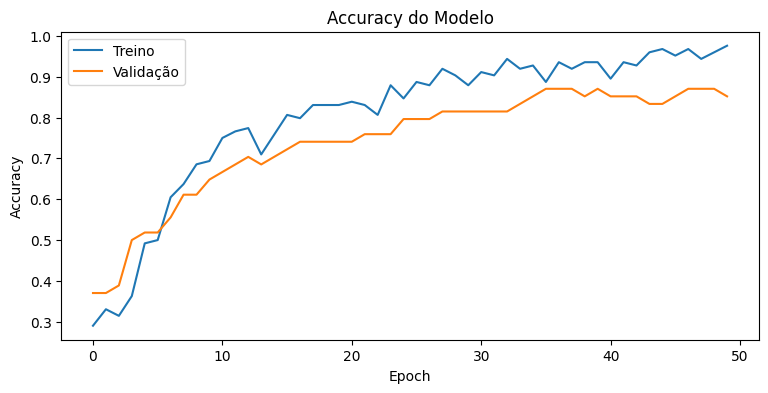

In [41]:
plt.figure(figsize=(9,4))

# Accuracy
plt.plot(historia.history['accuracy'], label='Treino')
plt.plot(historia.history['val_accuracy'], label='Validação')
plt.title('Accuracy do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("accuracy_modelo_st.png", dpi=300, bbox_inches='tight')
plt.legend()


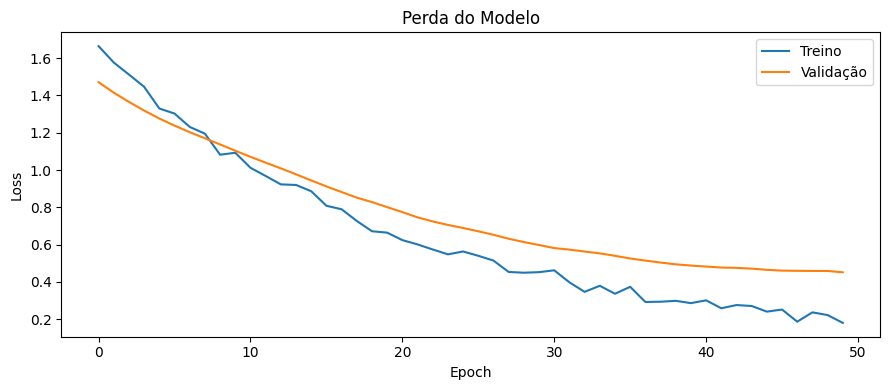

In [40]:
# Loss
plt.figure(figsize=(9,4))
plt.plot(historia.history['loss'], label='Treino')
plt.plot(historia.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss_modelo_st.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

Como podemos ver, a accuracy do modelo foi aumentando progressivamente consoante o números de epochs percorrido, os valores desta para a validação são menores do que no treino, expectável, apesar disso o alto valor, ~85% mostra que o modelo consegue prever corretamente dados ainda não vistos.

A perda decresce com cada epoch concluído, mostrando que o modelo cria previsões corretas e confiantes no treino. Contudo a perda na validação apresenta um valor de quase o dobro quando comparada ao treino, ~50%, o que mostra um ligeiro overfit na validação.

## 3. Avaliar o Modelo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


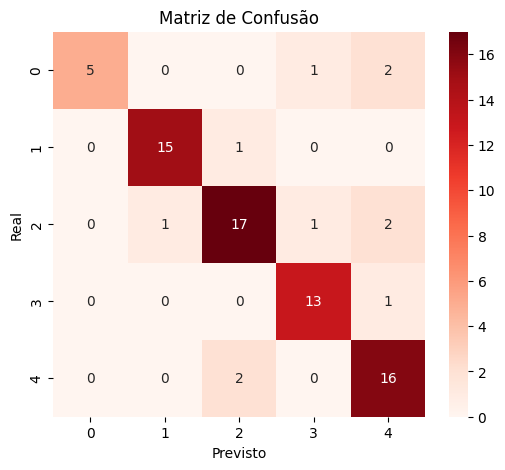

In [29]:
y_pred = modelo.predict(x_teste)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes = y_pred_classes


cm = confusion_matrix(y_teste, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.savefig("matriz_confusão_m1.png", dpi=300, bbox_inches='tight')

plt.show()


A matriz de confusão mostra uma clara falha na previsão correta da classe 0, valor 6 na matriz, apesar disso as restantes classes têm todas valores semelhantes.

Isto mostra que o modelo mesmo assim realiza um bom trabalho no ambiente geral do dataset.

In [30]:
print(classification_report(y_teste, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.94      0.94      0.94        16
           2       0.85      0.81      0.83        21
           3       0.87      0.93      0.90        14
           4       0.76      0.89      0.82        18

    accuracy                           0.86        77
   macro avg       0.88      0.84      0.85        77
weighted avg       0.87      0.86      0.86        77



Das métricas acima conseguimos chegar às conclusões: 
- O modelo prevê com sucesso a maioría das classes;
- As classes 0 e 2, mostram ser as onde erra mais, valores de recall abaixo de ~80%;
- Existe uma boa distribuição nas classes, macro e weighted average com valores perto dos 90%;

Ou seja, mesmo apesar do overfitting detetado anteriormente, não existe nenhuma classe com maior agregação de valores.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


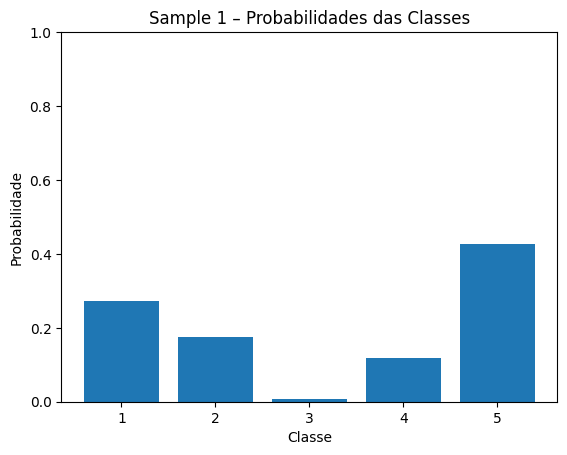

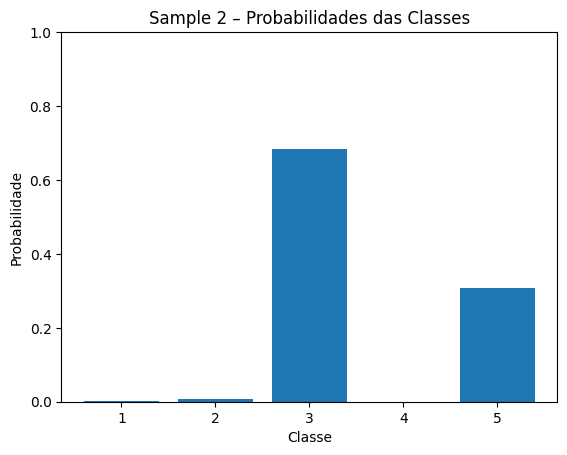

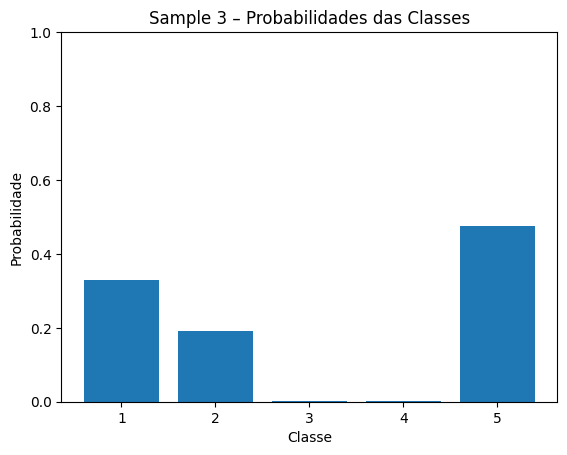

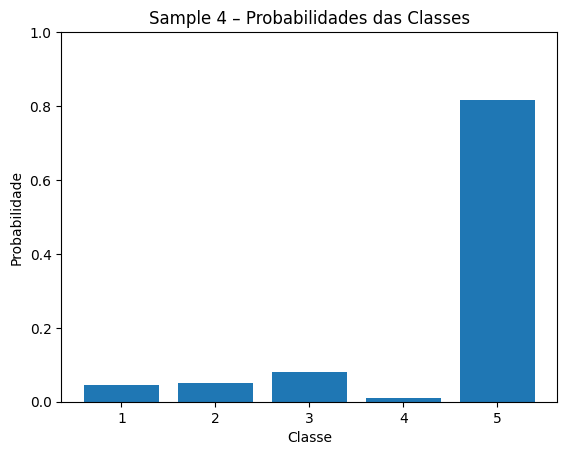

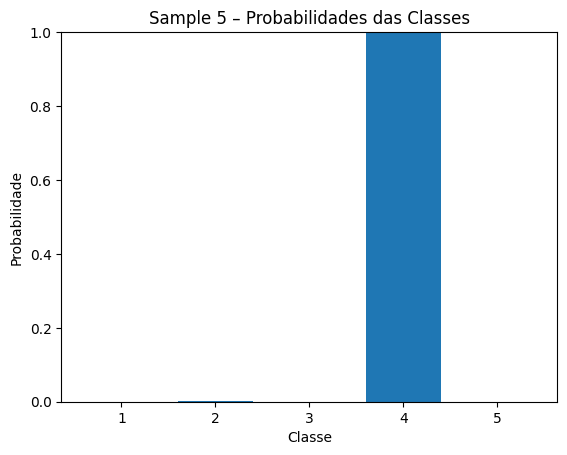

In [34]:
sample = x_teste[:5]
probs = modelo.predict(sample)

for i in range(5):
    plt.figure()
    plt.bar(np.arange(1, 6), probs[i])
    plt.title(f"Sample {i + 1} – Probabilidades das Classes")
    plt.xlabel("Classe")
    plt.ylabel("Probabilidade")
    plt.ylim(0, 1)

    # Save each plot with a different name
    plt.savefig(f"sample_{i+1}_class_probabilities.png", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()



Dos gráficos gerados conseguimos retirar as seguintes conclusões: 
- O modelo demonstra ser muito mais eficiente e seguro ao classificar objetos nas categorias 3, 4 e 5, isto pode indicar que estas classes possuem características mais fáceis de distinguir;
- Nas amostras 1 e 3, ocorre uma dispersão da probabilidade;
- O modelo oscilar entre as pontas, classe 1 prevista com menos confiança e a classe 5 acontecendo o contrário, sugere que essas amostras podem ter características ambíguas;
- A Classe 5 aparece como a resposta principal ou secundária em quase todos os cenários de dúvida, o que sugere um leve bias do modelo a "escolher" a classe 5 quando não tem certeza absoluta;

## 4. Conclusões

Depois de todas as etapas estarem concluídas conseguimos chegar às seguintes conclusões:

- O modelo aparenta ser bastante bom a escolher a classe 5, o que será um bom sinal se o nosso objetivo é não deixar nenhuma classe 5 passar despercebida;
- Contudo este bias vai afetar os nossos resultados quando quiseremos focar nas restantes classes, existe a possibilidades dos elementos nestas presentes serm falsamente classificados como se fossem da classe 5, irão existir muitos "falsos positivos";

Assim o modelo será uma boa abordagem sempre que a classe 5 for algo crítico, caso contrário o viés existente pode levar a análises erradas.